In [41]:
import numpy as np
import scipy.io as sio
import matplotlib.pyplot as plt
from utils.colormaps import b_viridis, b_winter

In [42]:
# Load data and rescale to physically meaningful original units
max_label = np.array([100, 0.17, 1e-4, 3.0])
min_label = np.array([5, 0.02, 1e-6, 0.2])
result_nn = sio.loadmat("result/quantification_UL.mat")['result_nn']
result_BE = np.transpose(np.reshape(result_nn, (27, 4, 256, 256)), (0, 2, 3, 1))
result_BE = result_BE * (max_label - min_label) + min_label
print("Quantitative maps shape: " + str(result_BE.shape))


Quantitative maps shape: (27, 256, 256, 4)


In [43]:
# Masking the background
mask = sio.loadmat('result/mask_mtc.mat')['mask']
mask_ = np.repeat(mask[:, :, :, np.newaxis], 4, axis=3)
result_BE[mask_<1] = 0


In [44]:
# Choosing slice to display (out of 27)
sl_num = 6
result_BE = result_BE[sl_num]
mask = mask[sl_num]

# Plot Rm
Rm_BE = result_BE[:, :, 0]
Rm_BE = Rm_BE[34:221, 47:212]
mask_ = mask[34:221, 47:212]

# Plot Mm
Mm_BE = result_BE[:, :, 1]
Mm_BE = Mm_BE[34:221, 47:212]

# Plot T2m
T2m_BE = result_BE[:, :, 2] * 1e6
T2m_BE = T2m_BE[34:221, 47:212]

# Plot T1w
T1w_BE = result_BE[:, :, 3]
T1w_BE = T1w_BE[34:221, 47:212]


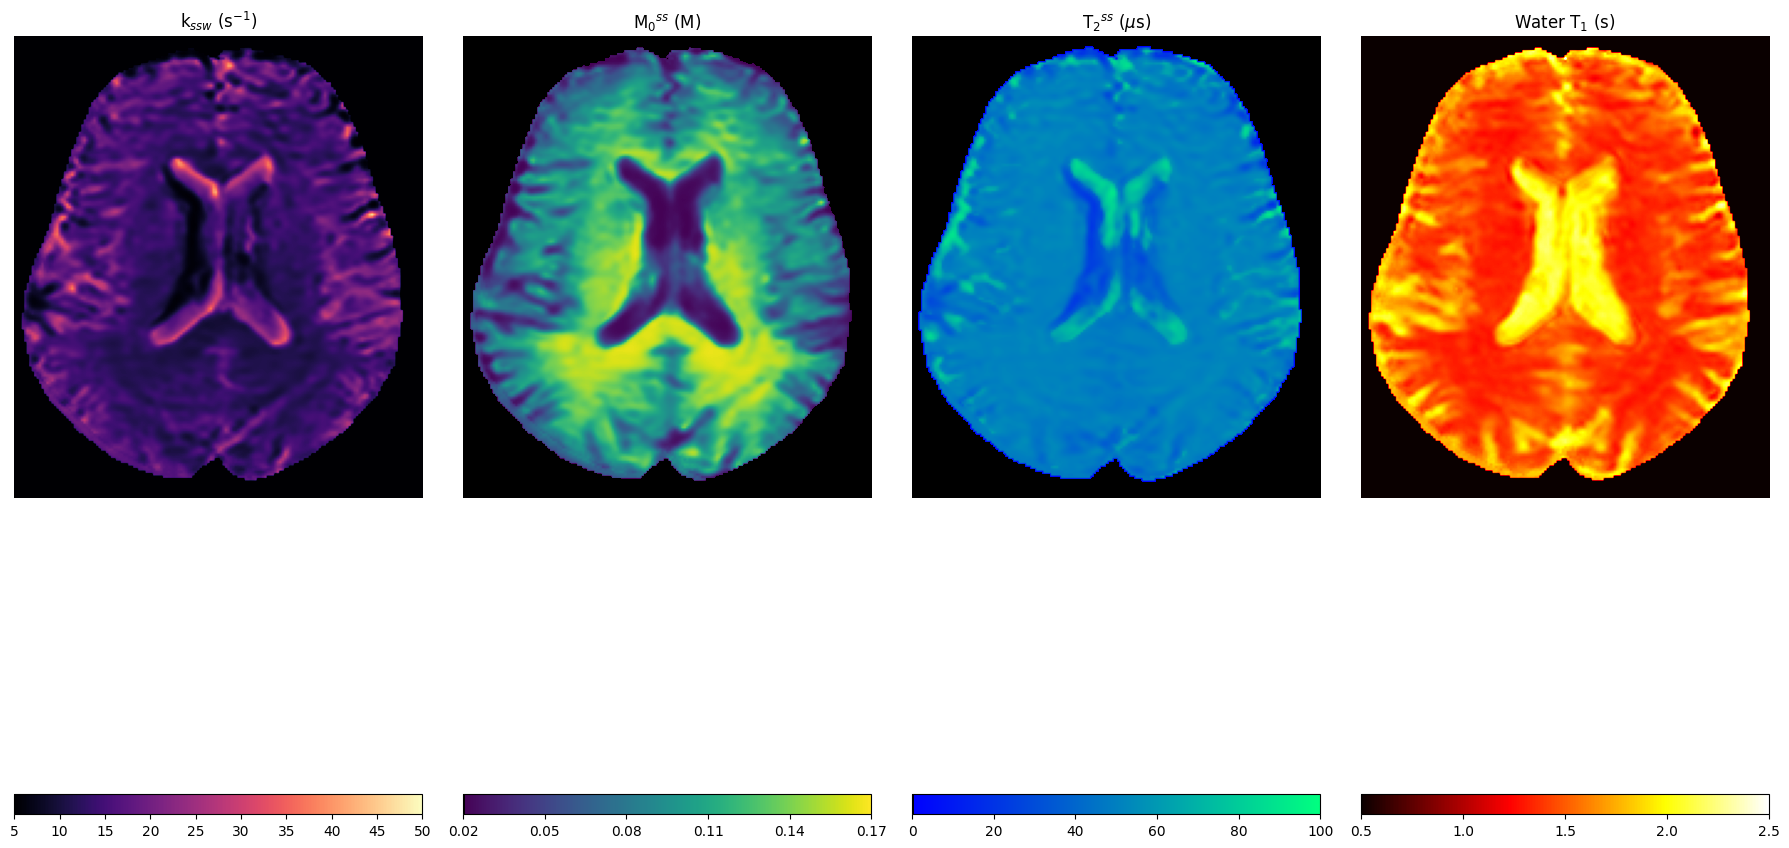

In [45]:
plt.figure(figsize=(18, 20))

plt.subplot(141)
plt.imshow(Rm_BE, vmin=5, vmax=50, cmap='magma')
plt.colorbar(orientation='horizontal', ticks=np.arange(5, 50 + 5, 5))
plt.title('k$_{ssw}$ (s$^{-1}$)')
plt.axis("off")

plt.subplot(142)
plt.imshow(Mm_BE, vmin=0.02, vmax=0.17, cmap=b_viridis)
plt.colorbar(orientation='horizontal', ticks=np.arange(0.02, 0.17 + 0.03, 0.03))
plt.title('M$_{0}$$^{ss}$ (M)')
plt.axis("off")

plt.subplot(143)
plt.imshow(T2m_BE, vmin=0, vmax=100, cmap=b_winter)
plt.colorbar(orientation='horizontal', ticks=np.arange(0, 100 + 20 , 20))
plt.title('T$_{2}$$^{ss}$ ($\mu$s)')
plt.axis("off")

plt.subplot(144)
plt.imshow(T1w_BE, vmin=0.5, vmax=2.5, cmap='hot')
plt.colorbar(orientation='horizontal', ticks=np.arange(0.5, 2.5 + 0.5 , 0.5))
plt.title('Water T$_{1}$ (s)')
plt.axis("off")

plt.tight_layout()
plt.subplots_adjust(wspace=0.1, hspace=0.1)  # Adjust spacing between subplots
plt.savefig('human_results_unsupervised.eps', format='eps')
plt.show()